In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from astropy.io import fits
from matplotlib import colors
from astropy.wcs import WCS

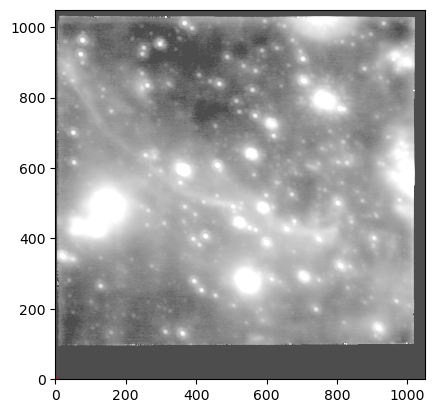

In [5]:
hdu_list = fits.open('/users/ava/Desktop/research/fits/mag20190619nirc2_lp.fits')
imgL = hdu_list[0].data
hdu_list[0].header

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [6]:
from astropy.io import fits

# Open the FITS file
hdul = fits.open('/users/ava/Desktop/research/fits/mag20190619nirc2_lp.fits')

# Get the image data and dimensions
image_data = hdul[0].data  # Assuming the image is in the primary HDU
rows, columns = image_data.shape

# Calculate the number of pixels
num_pixels = rows * columns

# Close the FITS file
hdul.close()

# Print the result
print(rows)
print(columns)
print(f"The FITS image contains {num_pixels} pixels.")

1050
1050
The FITS image contains 1102500 pixels.


In [7]:
filename =  '/users/ava/Desktop/research/lis/m20190619nirc2_lp_1_0.6_stf_cal.lis'
with open(filename) as f:
    for line in f:
        print(line)

       irs16C   8.075300  2019.464   557.09698   638.00500       25.65       1.00         3   53489200.000

      irs16NW   8.490300  2019.464   613.30298   723.53802       25.65       1.00         3   36510700.000

      irs16CC   9.346300  2019.464   461.34100   606.29498       25.65       1.00         3   16591700.000

       star_1   5.949300  2019.464   545.47302   277.52802       25.65       1.00         3  379104992.000

       irs29N   6.443300  2019.464   764.52197   790.00897       25.65       1.00         3  240560992.000

      irs16NE   7.508300  2019.464   363.95801   592.82898       25.65       1.00         3   90142096.000

       star_4   7.926300  2019.464  1023.03003   578.17798       25.65       0.91         0   61378800.000

       star_5   5.461300  2019.464   151.48700   494.54501       25.65       1.00         2  593984000.000

      irs16SW   8.168300  2019.464   590.19000   485.50400       25.65       1.00         3   49101000.000

    irs16SW-E   8.191300  20

3.9711802
6.5288198
4.73924
5.76076


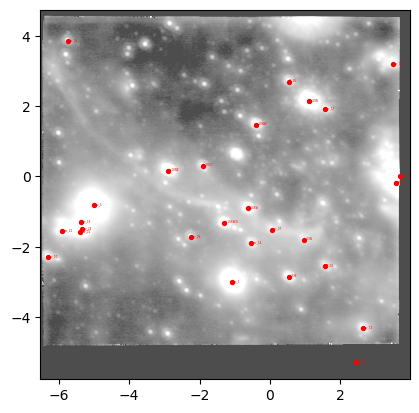

In [8]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

pixels = 1050

x_offset = 0.95785 / 0.01
y_offset = 0.61929/ 0.01

x_pos = 557.09698 + x_offset
y_pos = 638.005 - y_offset

right_arc = (pixels - x_pos)*0.01
left_arc = x_pos*0.01
up_arc = (pixels - y_pos)*0.01
down_arc = y_pos*0.01

print(right_arc)
print(left_arc)
print(up_arc)
print(down_arc)

starpos = np.loadtxt('/users/ava/Desktop/research/lis/m20190619nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-left_arc, right_arc, -down_arc, up_arc], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/Desktop/research/lis/m20190619nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/Desktop/research/lis/m20190619nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 10:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0]-left_arc), (starpos_arcsec[i, 1]-down_arc), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]-left_arc, starpos_arcsec[i, 1]-down_arc], color='red', size=2)

plt.show()